In [1]:
import mysql.connector
import matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import pandas as pd

In [2]:
# remote.close()
import mysql.connector
remote = mysql.connector.connect(
    host = "database-1.***************.amazonaws.com", #insert sql path
    port = 3306,
    user = "eda",
    password = "*******",
    database= 'eda'
)
cur = remote.cursor(buffered=True)

In [3]:
#전국 서울 경기도 제외
# sql = """ select city, year, month,pop_sum from population where city!='전국' and city!='서울특별시' and city!='경기도' 
#     and month='01' and (year='2008'or year='2012' or year='2016' or year='2020' or year='2024')
#         ; 
#     """
# 서울 경기도 
sql = """ select city, year, month,open from factory 
        ; 
    """

cur.execute(sql)
result = cur.fetchall()
# for line in result:
#     print(line)

    # remote.commit()

In [4]:
factory_df=pd.DataFrame(result,columns=['city','year','month','open'])

In [5]:
factory_df['date']=factory_df['year']+factory_df['month']

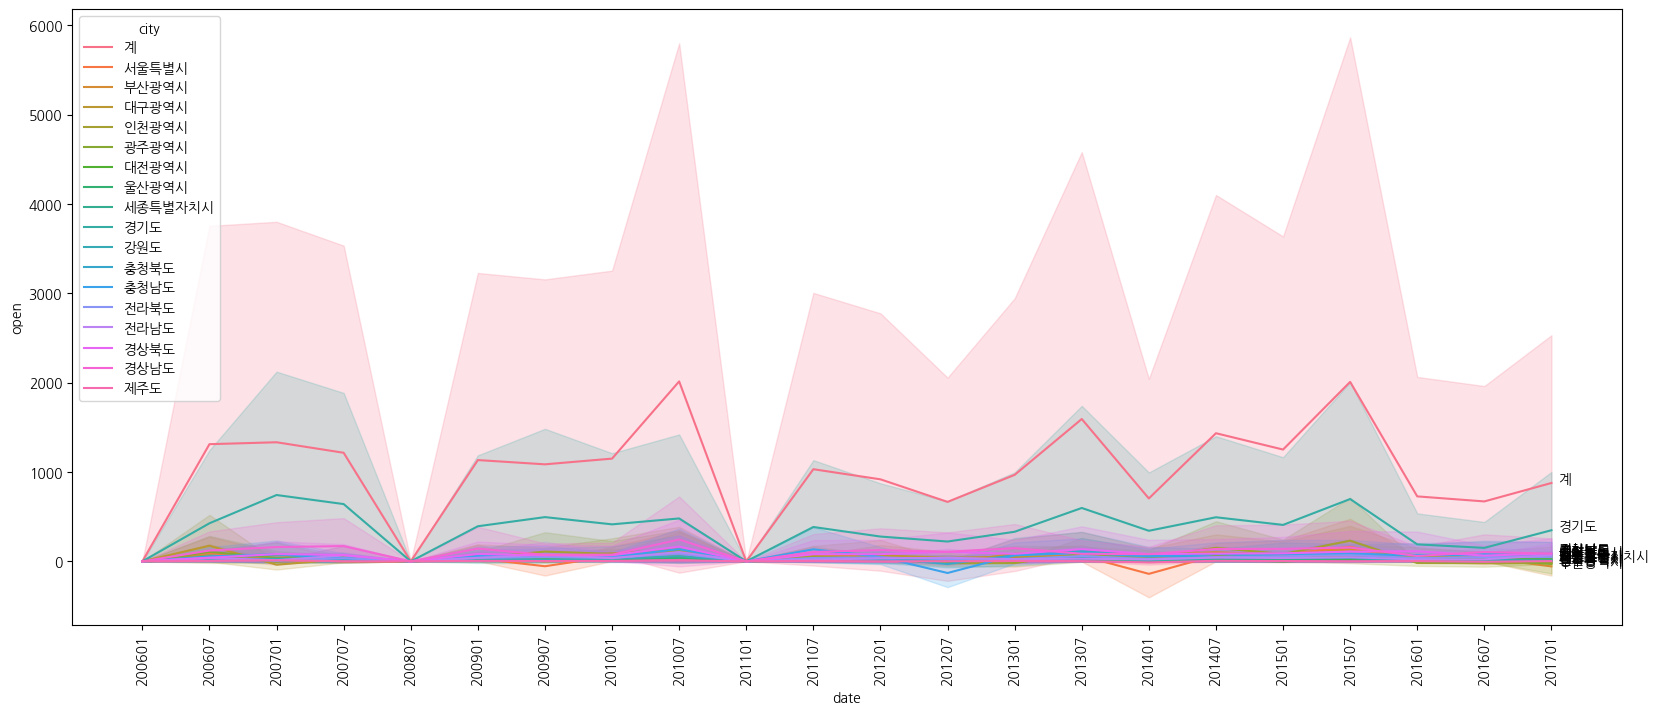

In [6]:
plt.figure(figsize=(20,8))
line_plot=sns.lineplot(data=factory_df,x='date',y='open',hue='city')
plt.xticks(rotation=90)
for line, name in zip(line_plot.get_lines(), factory_df["city"].unique()):
    y_values = line.get_ydata()[-1]
    x_values = line.get_xdata()[-1]
    line_plot.annotate(name, (x_values, y_values), xytext=(5, 0), textcoords="offset points")

대기업 중기업 소기업 별로 open graph

In [7]:
factory_bms_df_list=[]
for i,type in enumerate(['대기업','중기업','소기업']):
    sql = """ select city,type, concat(year,month) as date,open, sum(open) over (partition by city order by year asc, month asc) as cum_open from factory  where type='{}' and (city in ('서울특별시','인천광역시','경기도')) 
            order by city asc, date; 
        """.format(type)

    cur.execute(sql)
    result = cur.fetchall()
    # for line in result:
    #     print(line)

        # remote.commit()
    factory_bms_df_list.append(pd.DataFrame(result,columns=['city','type','date','open','cum_open']))
    # factory_bms_df_list[i]['date']=factory_bms_df_list[i]['year']+factory_bms_df_list[i]['month']


In [8]:
factory_bms_df_list[2].tail()

,city,type,date,open,cum_open
61,인천광역시,소기업,201501,243,2558
62,인천광역시,소기업,201507,713,3271
63,인천광역시,소기업,201601,-51,3220
64,인천광역시,소기업,201607,-60,3160
65,인천광역시,소기업,201701,-30,3130


/tmp/ipykernel_5309/1508176114.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(factory_bms_df_list[0]['date'],rotation=90)
/tmp/ipykernel_5309/1508176114.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][1].set_xticklabels(factory_bms_df_list[1]['date'],rotation=90)
/tmp/ipykernel_5309/1508176114.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1][0].set_xticklabels(factory_bms_df_list[2]['date'],rotation=90)


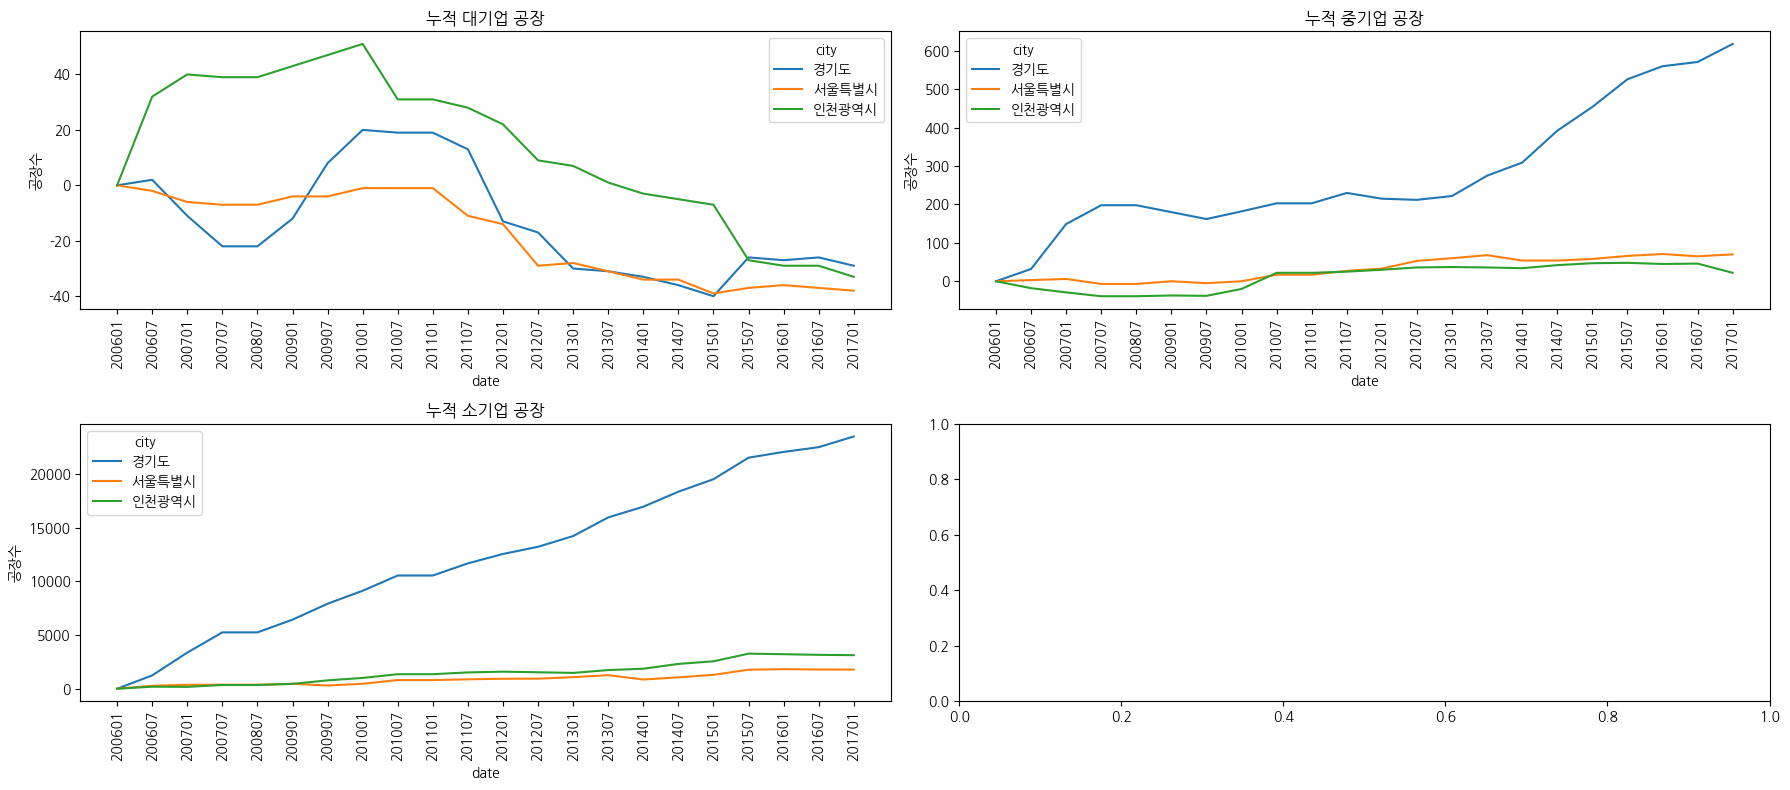

In [9]:
f , ax = plt.subplots(2,2,figsize=(18,8))


# sns.lineplot(data=factory_bms_df_list[0],x='date',y='open',hue='city',ax=ax[0][0])
# ax[0][0].set_xticklabels(factory_bms_df_list[0]['date'],rotation=90)
# ax[0][0].set_title('대기업 공장')

sns.lineplot(data=factory_bms_df_list[0],x='date',y='cum_open',hue='city',ax=ax[0][0])
ax[0][0].set_xticklabels(factory_bms_df_list[0]['date'],rotation=90)
ax[0][0].set_title('누적 대기업 공장')
ax[0][0].set_ylabel('공장수')


# for line, name in zip(line_plot.get_lines(), factory_bms_df_list[0]["city"].unique()):
#     y_values = line.get_ydata()[-1]
#     x_values = line.get_xdata()[-1]
#     line_plot.annotate(name, (x_values, y_values), xytext=(5, 0), textcoords="offset points")

sns.lineplot(data=factory_bms_df_list[1],x='date',y='cum_open',hue='city',ax=ax[0][1])
ax[0][1].set_xticklabels(factory_bms_df_list[1]['date'],rotation=90)
ax[0][1].set_title('누적 중기업 공장')
ax[0][1].set_ylabel('공장수')

sns.lineplot(data=factory_bms_df_list[2],x='date',y='cum_open',hue='city',ax=ax[1][0])
ax[1][0].set_xticklabels(factory_bms_df_list[2]['date'],rotation=90)
ax[1][0].set_title('누적 소기업 공장')
ax[1][0].set_ylabel('공장수')

ax[1][1]
plt.tight_layout()

/tmp/ipykernel_5309/1114846210.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(factory_bms_df_list[0]['date'],rotation=90)
/tmp/ipykernel_5309/1114846210.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][1].set_xticklabels(factory_bms_df_list[1]['date'],rotation=90)
/tmp/ipykernel_5309/1114846210.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1][0].set_xticklabels(factory_bms_df_list[2]['date'],rotation=90)


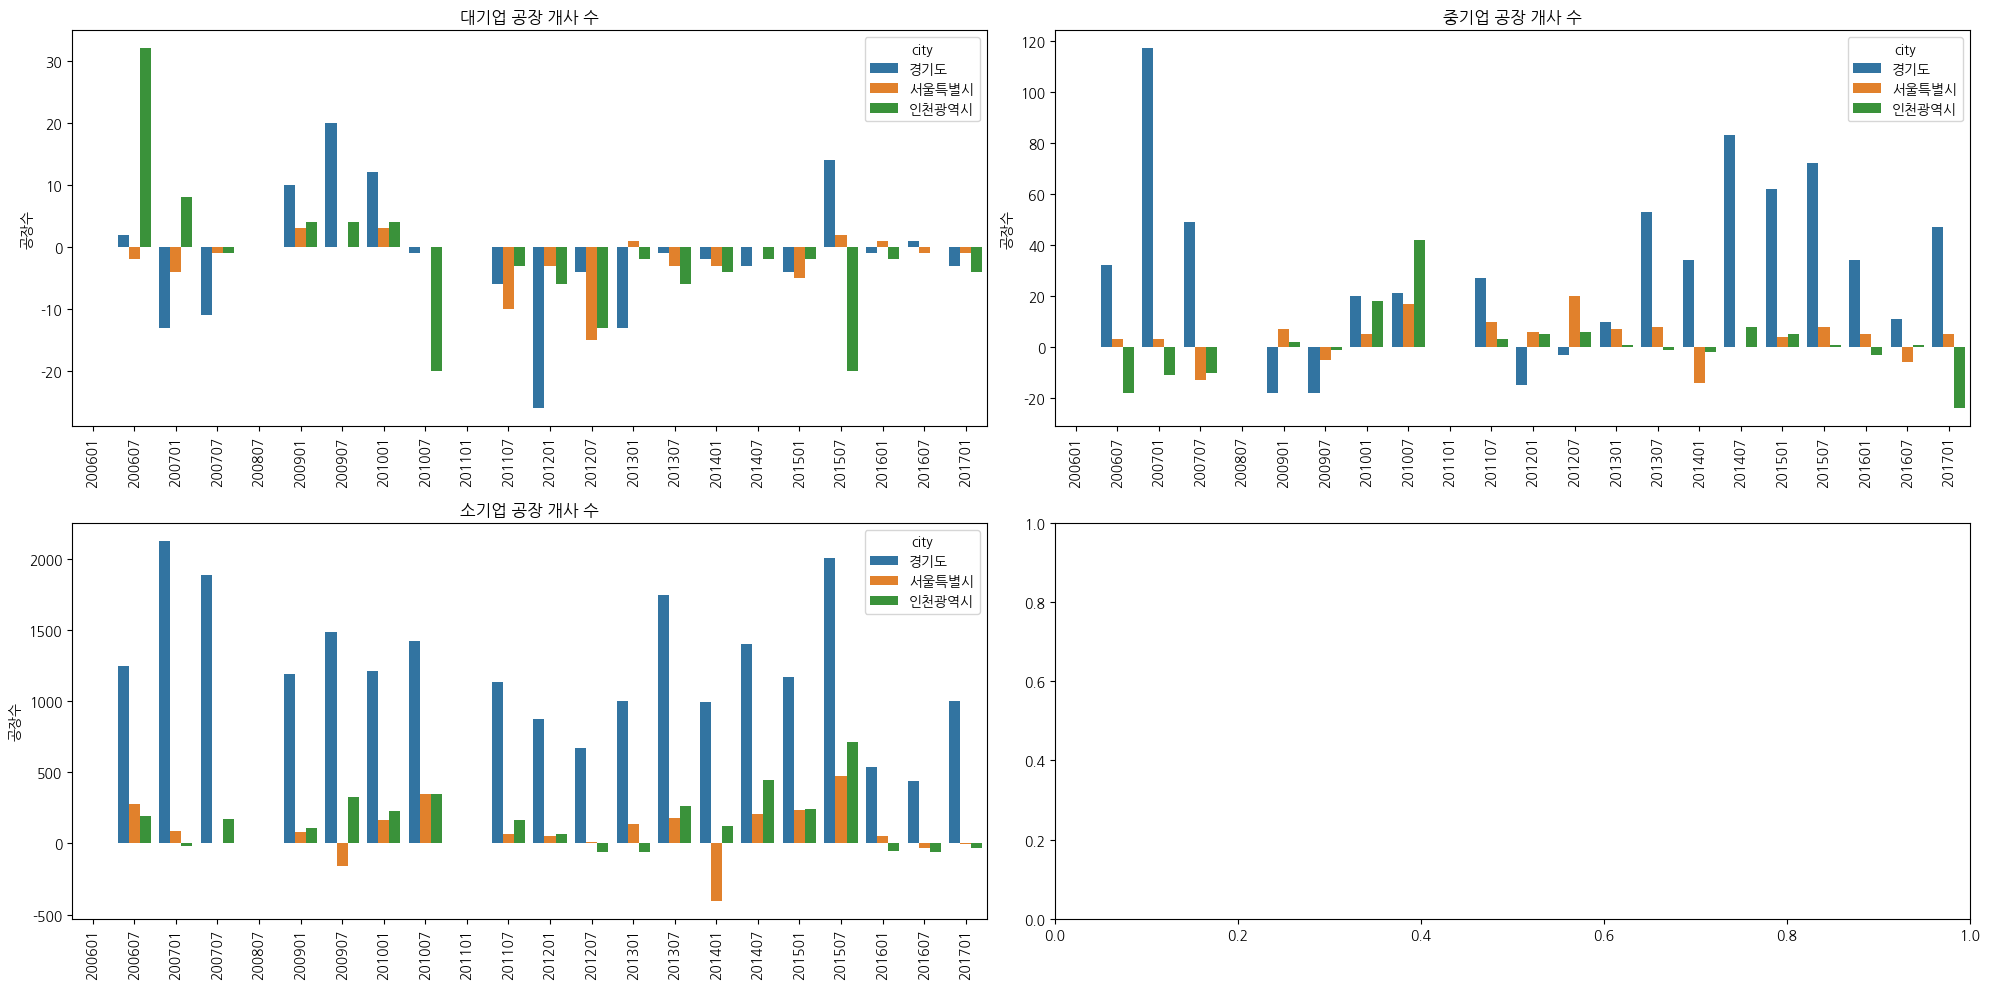

In [10]:
f , ax = plt.subplots(2,2,figsize=(20,10))


# sns.lineplot(data=factory_bms_df_list[0],x='date',y='open',hue='city',ax=ax[0][0])
# ax[0][0].set_xticklabels(factory_bms_df_list[0]['date'],rotation=90)
# ax[0][0].set_title('대기업 공장')

sns.barplot(data=factory_bms_df_list[0],x='date',y='open',hue='city',ax=ax[0][0])
ax[0][0].set_xticklabels(factory_bms_df_list[0]['date'],rotation=90)
ax[0][0].set_xlabel('')
ax[0][0].set_title('대기업 공장 개사 수')
ax[0][0].set_ylabel('공장수')


# for line, name in zip(line_plot.get_lines(), factory_bms_df_list[0]["city"].unique()):
#     y_values = line.get_ydata()[-1]
#     x_values = line.get_xdata()[-1]
#     line_plot.annotate(name, (x_values, y_values), xytext=(5, 0), textcoords="offset points")

sns.barplot(data=factory_bms_df_list[1],x='date',y='open',hue='city',ax=ax[0][1])
ax[0][1].set_xticklabels(factory_bms_df_list[1]['date'],rotation=90)
ax[0][1].set_xlabel('')
ax[0][1].set_title('중기업 공장 개사 수')
ax[0][1].set_ylabel('공장수')

sns.barplot(data=factory_bms_df_list[2],x='date',y='open',hue='city',ax=ax[1][0])
ax[1][0].set_xticklabels(factory_bms_df_list[2]['date'],rotation=90)
ax[1][0].set_xlabel('')
ax[1][0].set_title('소기업 공장 개사 수')
ax[1][0].set_ylabel('공장수')

plt.tight_layout()

In [11]:
factory_bms_df_list[2]

,city,type,date,open,cum_open
0,경기도,소기업,200601,0,0
1,경기도,소기업,200607,1245,1245
2,경기도,소기업,200701,2124,3369
3,경기도,소기업,200707,1886,5255
4,경기도,소기업,200807,0,5255
...,...,...,...,...,...
61,인천광역시,소기업,201501,243,2558
62,인천광역시,소기업,201507,713,3271
63,인천광역시,소기업,201601,-51,3220
64,인천광역시,소기업,201607,-60,3160


In [12]:
df_list=[]
for city in ['서울특별시','경기도','인천광역시']:
    sql="""select p.pop_sum
        from population p, factory f
        where concat(p.year,p.month)=concat(f.year,f.month) 

            and p.city='{}' and f.city='{}'

            ;
        """.format(city,city)
    cur.execute(sql)
    result = cur.fetchall()
    
    df_list.append(pd.DataFrame(result,columns=['{}인구수'.format(city)]))

    for type in ['대기업','중기업','소기업']:
        sql="""select sum(f.open) over (partition by f.city order by f.year asc, f.month asc) as cum_open
        from population p, factory f
        where concat(p.year,p.month)=concat(f.year,f.month) 
            and f.type='{}'
            and f.city='{}'
            and p.city='{}'

            ;
        """.format(type,city,city)
        cur.execute(sql)
        result = cur.fetchall()

        df_list.append(pd.DataFrame(result,columns=['{} {}공장누적수'.format(city,type)]))



In [13]:
pop_fact_df=pd.concat(df_list,axis=1)

In [14]:
pop_fact_df.head()

,서울특별시인구수,서울특별시 대기업공장누적수,서울특별시 중기업공장누적수,서울특별시 소기업공장누적수,경기도인구수,경기도 대기업공장누적수,경기도 중기업공장누적수,경기도 소기업공장누적수,인천광역시인구수,인천광역시 대기업공장누적수,인천광역시 중기업공장누적수,인천광역시 소기업공장누적수
0,10196644,0,0,0,11212042,0,0,0,2687508,0,0,0
1,10196644,3,7,84,11212042,10,-18,1187,2687508,4,2,107
2,10196644,3,2,-75,11212042,30,-36,2671,2687508,8,1,433
3,10207304,6,7,90,11300278,42,-16,3882,2693123,12,19,660
4,10207304,6,24,434,11300278,41,5,5303,2693123,-8,61,1007


표준화 해봄

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
test_scaler=StandardScaler()
df_scaled=pd.DataFrame(test_scaler.fit_transform(pop_fact_df),columns=pop_fact_df.columns)
df_scaled.head()

,서울특별시인구수,서울특별시 대기업공장누적수,서울특별시 중기업공장누적수,서울특별시 소기업공장누적수,경기도인구수,경기도 대기업공장누적수,경기도 중기업공장누적수,경기도 소기업공장누적수,인천광역시인구수,인천광역시 대기업공장누적수,인천광역시 중기업공장누적수,인천광역시 소기업공장누적수
0,0.378922,0.966496,-1.652095,-1.368320,-1.751648,-0.365251,-0.778204,-1.656620,-1.519950,1.072496,-1.967475,-1.612362
1,0.378922,1.167230,-1.400385,-1.195436,-1.751648,0.129074,-0.895587,-1.445363,-1.519950,1.219302,-1.900655,-1.494826
2,0.378922,1.167230,-1.580178,-1.522681,-1.751648,1.117723,-1.012969,-1.181246,-1.519950,1.366107,-1.934065,-1.136727
3,0.485085,1.367964,-1.400385,-1.183088,-1.557888,1.710912,-0.882544,-0.965718,-1.456857,1.512913,-1.332686,-0.887376
4,0.485085,1.367964,-0.789090,-0.475087,-1.557888,1.661480,-0.745598,-0.712814,-1.456857,0.778885,0.070532,-0.506209


In [ ]:
예산
서울 예산 : 서울예산 / 서울예산 max
경기 예산 : 경기예산 / 경기예산 max

In [31]:
max_devide_data=pop_fact_df.copy()

In [35]:
for i in range(len(max_devide_data.columns)):
    max_devide_data[max_devide_data.columns[i]]=max_devide_data[max_devide_data.columns[i]]/max_devide_data[max_devide_data.columns[i]].max()

In [36]:
max_devide_data.head()

,서울특별시인구수,서울특별시 대기업공장누적수,서울특별시 중기업공장누적수,서울특별시 소기업공장누적수,경기도인구수,경기도 대기업공장누적수,경기도 중기업공장누적수,경기도 소기업공장누적수,인천광역시인구수,인천광역시 대기업공장누적수,인천광역시 중기업공장누적수,인천광역시 소기업공장누적수
0,0.988733,0,0,0,0.880853,0,0,0,0.912874,0,0,0
1,0.988733,0.5,0.08974358974358974358974358974,0.05793103448275862068965517241,0.880853,0.2380952380952380952380952381,-0.04285714285714285714285714286,0.06497345229623953144671301111,0.912874,0.3333333333333333333333333333,0.02298850574712643678160919540,0.03660622647964420116318850496
2,0.988733,0.5,0.02564102564102564102564102564,-0.05172413793103448275862068966,0.880853,0.7142857142857142857142857143,-0.08571428571428571428571428571,0.1462039520499206305763862280,0.912874,0.6666666666666666666666666667,0.01149425287356321839080459770,0.1481354772494013000342114266
3,0.989767,1,0.08974358974358974358974358974,0.06206896551724137931034482759,0.887785,1,-0.03809523809523809523809523810,0.2124911051508019048661667305,0.914781,1,0.2183908045977011494252873563,0.2257954156688333903523776941
4,0.989767,1,0.3076923076923076923076923077,0.2993103448275862068965517241,0.887785,0.9761904761904761904761904762,0.01190476190476190476190476190,0.2902731402922984290327877826,0.914781,-0.6666666666666666666666666667,0.7011494252873563218390804598,0.3445090660280533698255217243


Text(0.5, 1.0, 'max_devide_corr')

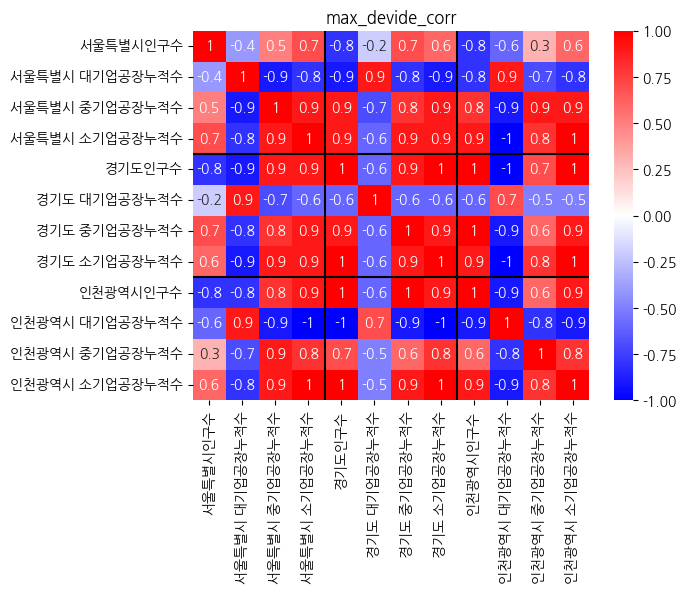

In [37]:
max_correlation_matrix=max_devide_data.corr().round(1)
sns.heatmap(data=max_correlation_matrix,annot=True,cmap='bwr')
for x in range(4, max_correlation_matrix.shape[1], 4):
    plt.vlines(x, 0, max_correlation_matrix.shape[0], colors='black', linestyles='solid')
    plt.hlines(x, 0, max_correlation_matrix.shape[0], colors='black', linestyles='solid')
plt.title('max_devide_corr')

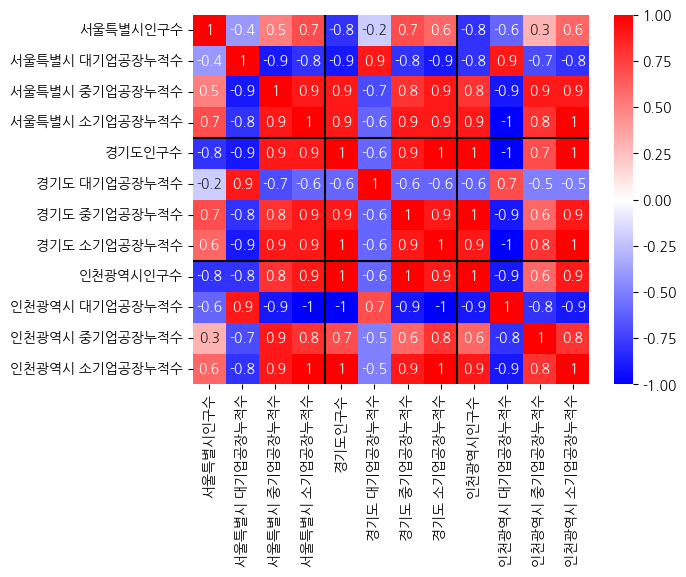

In [19]:
correlation_matrix=pop_fact_df.corr().round(1)
sns.heatmap(data=correlation_matrix,annot=True,cmap='bwr')
for x in range(4, correlation_matrix.shape[1], 4):
    plt.vlines(x, 0, correlation_matrix.shape[0], colors='black', linestyles='solid')
    plt.hlines(x, 0, correlation_matrix.shape[0], colors='black', linestyles='solid')

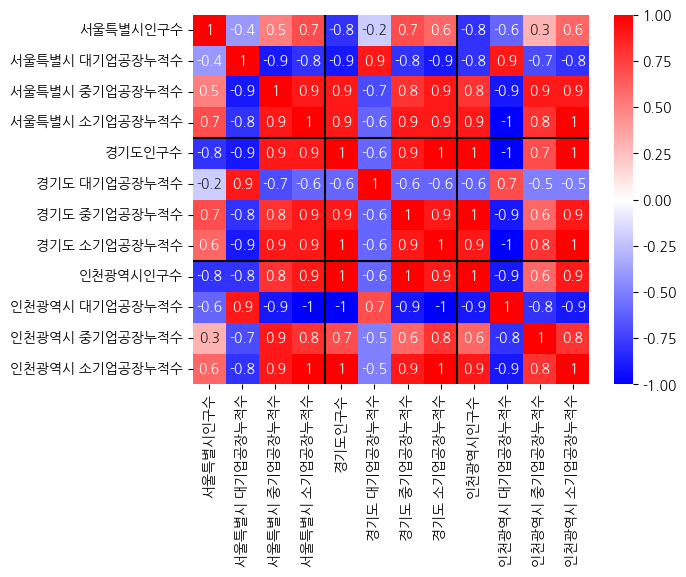

In [18]:
scaled_correlation_matrix=df_scaled.corr().round(1)
sns.heatmap(data=scaled_correlation_matrix,annot=True,cmap='bwr')
for x in range(4, scaled_correlation_matrix.shape[1], 4):
    plt.vlines(x, 0, scaled_correlation_matrix.shape[0], colors='black', linestyles='solid')
    plt.hlines(x, 0, scaled_correlation_matrix.shape[0], colors='black', linestyles='solid')